### Image classification using MNIST dataset in Neural Network
1. Classification of MNIST image dataset
2. Using Keras classfication model
3. Train and Predict Model images

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras

2025-11-04 16:00:33.693656: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-04 16:00:33.736190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-04 16:00:35.325684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x, y, z ==> 3D Images
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)


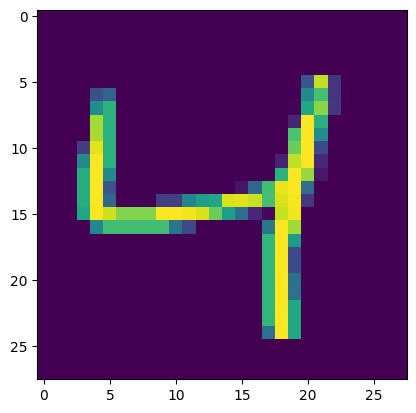

In [3]:
# Show first row image (handwritten)
plt.imshow(x_train[2])

In [4]:
# Images features and pre-processing
# Converting 3D dimensions to 2D (Flatten Images)
n_features = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], n_features).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_features).astype('float32')


In [5]:
# Target feature into categorial values
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Making classification model
from keras.models import Sequential
from keras.layers import Dense, Input

# classes in output
n_classes = y_train.shape[1]

def classification_model():
    model = Sequential()
    model.add(Input(shape= (n_features,)))
    model.add(Dense(n_features, activation= 'relu'))
    model.add(Dense(100, activation= 'relu'))
    model.add(Dense(n_classes, activation= 'softmax'))

    model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
    return model

model = classification_model()

In [7]:
# Model fit and prediction
training = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 10, verbose= 2)

Epoch 1/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8368 - loss: 1.1667 - val_accuracy: 0.8854 - val_loss: 0.4112
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9227 - loss: 0.2895 - val_accuracy: 0.9363 - val_loss: 0.2561
Epoch 3/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9487 - loss: 0.1941 - val_accuracy: 0.9577 - val_loss: 0.1664
Epoch 4/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9595 - loss: 0.1530 - val_accuracy: 0.9588 - val_loss: 0.1742
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9658 - loss: 0.1327 - val_accuracy: 0.9587 - val_loss: 0.1856
Epoch 6/10
1875/1875 - 8s - 5ms/step - accuracy: 0.9696 - loss: 0.1160 - val_accuracy: 0.9567 - val_loss: 0.1888
Epoch 7/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9740 - loss: 0.1061 - val_accuracy: 0.9640 - val_loss: 0.1656
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9764 - loss: 0.0945 - val_accuracy: 0.9595 - val_loss: 0.1697
Epoch 9/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9783 - loss: 0.0885 - val_accuracy: 0.9566 -

In [10]:
# Model Prediction
predict = model.predict(x_test)

 33/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


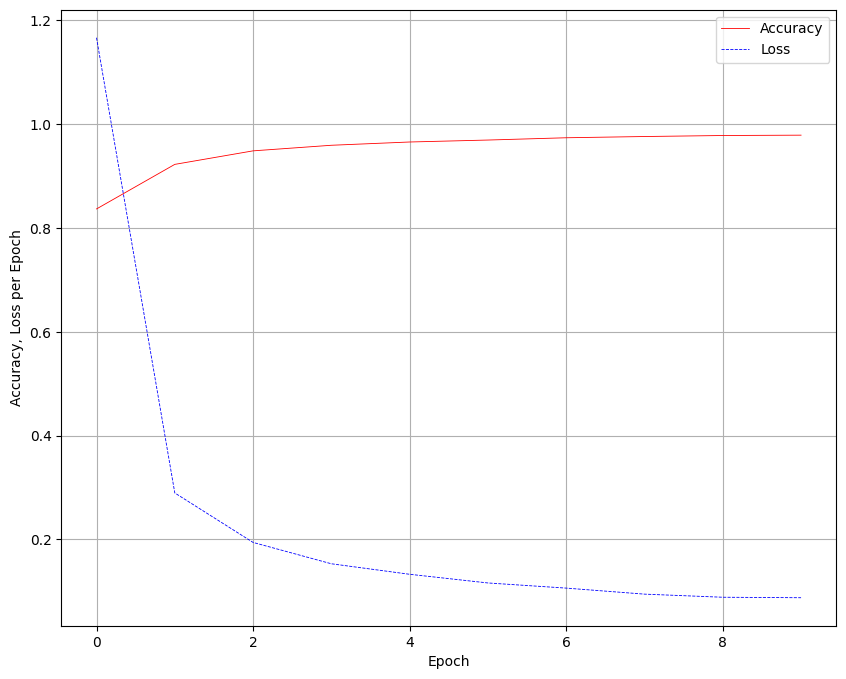

In [9]:
# Visualization of Epoch with accuracy and loss
plt.figure(figsize= (10, 8))

plt.plot(training.history['accuracy'], linewidth= 0.6, color= 'red', label= 'Accuracy')
plt.plot(training.history['loss'], linewidth= 0.6, linestyle= '--', color = 'blue', label= 'Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy, Loss per Epoch')
plt.grid(visible= True, axis= 'both')
plt.show()

In [11]:
# Model Evaluations
model_scores = model.evaluate(x_test, y_test, verbose= 0)
print(f'Model Evaluation score: {np.round(model_scores[1] * 100, 2)}%')


Model Evaluation score: 96.88%


In [12]:
# Saving Model
model.save('classification_model.keras')

In [13]:
# Use Pre-Trained Model
pretrained_model = keras.saving.load_model('classification_model.keras')

In [14]:
print(pretrained_model)

<Sequential name=sequential, built=True>
